In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CDSS/Data Folder/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,2,20,16,6
3,4,2,23,16,77
4,5,2,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [6]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


In [ ]:
#display the unique categories of Gender variable
#count the observations for each category
df["Gender"].unique()

array([1, 2])

In [4]:
df["Gender"].value_counts()

Gender
2    112
1     88
Name: count, dtype: int64

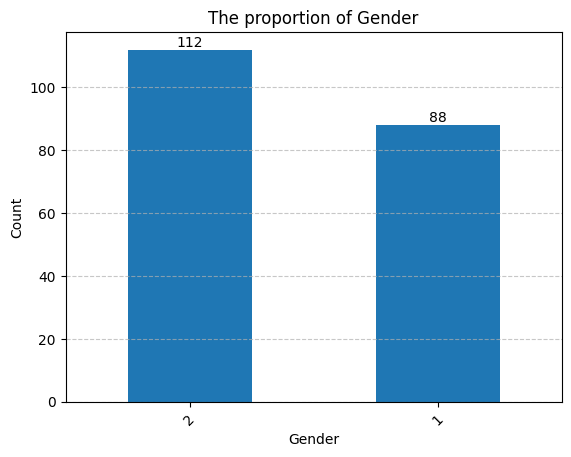

In [7]:
# Gender Bar Chart

barGender = df['Gender'].value_counts()
barGender.plot(kind='bar')

plt.title('The proportion of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the count of survivors
for i, value in enumerate(barGender):
    plt.text(i, value, str(value), ha='center', va='bottom')

#show the plot
plt.show()

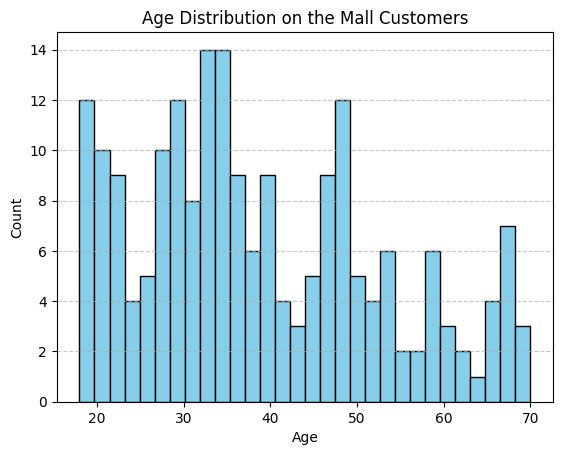

In [8]:
# histogram for Age
df['Age'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution on the Mall Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

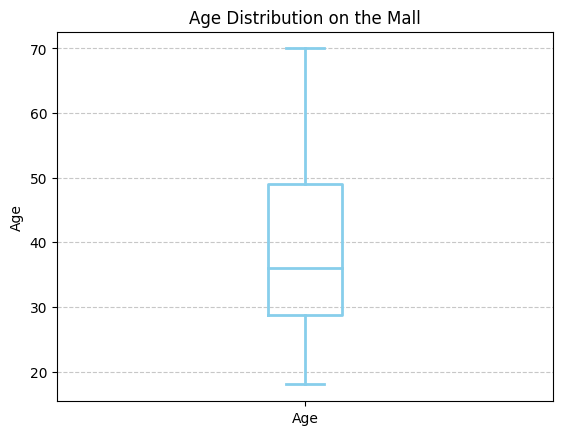

In [ ]:
# boxplot for Age
boxplot = df['Age'].plot(kind='box', color='skyblue')
plt.title('Age Distribution on the Mall')
plt.ylabel('Age')
for line in boxplot.lines:
    line.set_linewidth(2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import numpy as np

In [ ]:
# calculate lower fence and upper fence and determine if we have any outliers in the age variable

q1 = np.percentile(df.Age, 25)
q3 = np.percentile(df.Age, 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound)
print(upr_bound)

-1.625
79.375


In [ ]:
# calculate lower fence and upper fence and determine if we have any outliers in the age variable
AGE = df["Age"]

q1 = np.percentile(AGE , 25)
q3 = np.percentile(AGE , 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound)
print(upr_bound)

-1.625
79.375


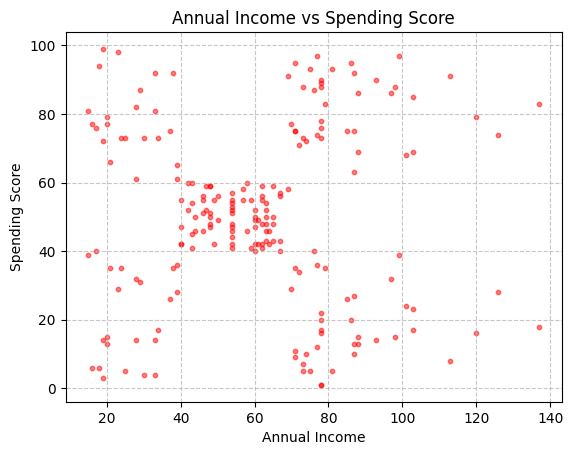

In [10]:
#create a scatter plot for spending score and annual income
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.5, c='red', s=10)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,2,20,16,6
3,4,2,23,16,77
4,5,2,31,17,40


## **Step 1: Determine number of clusters**

You need to decide how many clusters (K) you want to create. One way to do this is by using the elbow method, which plots the within-cluster sum of squares (WCSS) for different values of K and looks for the "elbow" point where the WCSS starts to level off.

* wcss = []: This initializes an empty list called wcss (Within-Cluster Sum of Squares).
* for i in range(1, 11): This sets up a loop that iterates from 1 to 10. It will evaluate K-Means clustering for different values of K, ranging from 1 to 10 clusters.
* kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0): Within the loop, a K-Means clustering model is created for the current value of K (i.e., the number of clusters you're testing). The n_clusters parameter is set to i, which is the current value in the loop. Other parameters are also set:
* init='k-means++': This specifies the initialization method for the cluster centers, which is a smart way to initialize the centroids.
* max_iter=300: This sets the maximum number of iterations for each K-Means run.
* n_init=10: This specifies the number of times the K-Means algorithm will be run with different initializations. The best result (lowest WCSS) will be chosen.
* random_state=0: This sets the random seed for reproducibility.
* kmeans.fit(df): The K-Means model is fitted to the data in the DataFrame df.
* wcss.append(kmeans.inertia_): After fitting the K-Means model, the Within-Cluster Sum of Squares (WCSS) for the current value of K is computed and appended to the wcss list. WCSS is a measure of the sum of squared distances between data points and their assigned cluster centers. It's a measure of how well the data points are clustered within their respective clusters.
* After the loop completes, you have a list wcss containing the WCSS values for each tested value of K (from 1 to 10).


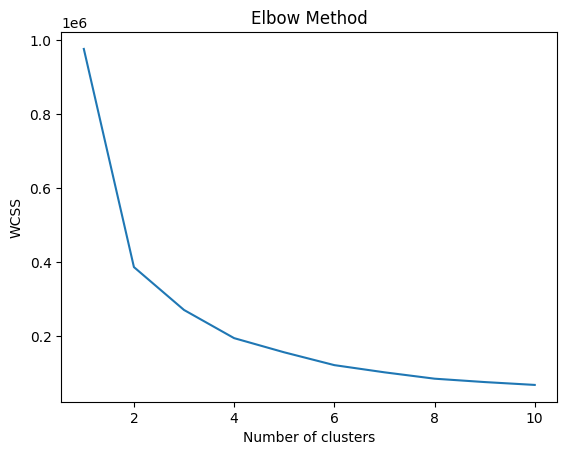

In [ ]:
wcss = []    #within cluster sum of squares # give us the optimal number of clusters

# init = initialisation of centroids
# max_iter = max number of iterations for each K_Means run
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# when the line starts to show consistent to zero, that is the optimal number of clusters



# **Step 2: Apply kmeans clustering**

> Indented block


Once you've determined the optimal K (in this case, let's assume K=5 based on the elbow method), you can apply K-Means clustering.

In [24]:
# Fit K-Means to the data with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# fit_predict = predict number of clusters for each observations in dataset
clusters = kmeans.fit_predict(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Create separate dataframes for each cluster
cluster_dataframes = [df[df['Cluster'] == i] for i in range(5)]


In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,2,20,16,6,3
3,4,2,23,16,77,4
4,5,2,31,17,40,3


In [25]:
# model evaluation is compulsory
from sklearn.metrics import silhouette_score

# Separating features and cluster labels
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
# cluster number is the target
cluster_labels = df['Cluster']

# Computing the silhouette score
# if closer to 1, well separated clusters
silhouette = silhouette_score(features, cluster_labels)
print(f"Silhouette Score: {silhouette}")


Silhouette Score: 0.38281324286320995


A silhouette score closer to +1 indicates well-separated clusters, while a score closer to -1 indicates overlapping clusters.

KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0): This line initializes a K-Means clustering model with the following parameters:

* n_clusters=5: Specifies that you want to create 5 clusters
* init='k-means++': Indicates that the algorithm should use the "k-means++" method to initialize cluster centroids, which is a smart initialization strategy.
* max_iter=300: Sets the maximum number of iterations for each run of the K-Means algorithm to 300.
* n_init=10: Specifies that the algorithm should be run 10 times with different initializations, and the best result (lowest WCSS) will be chosen.
* random_state=0: Sets a random seed for reproducibility.

**clusters = kmeans.fit_predict(df):** This line fits the K-Means model to the dataset df and assigns each data point to one of the 5 clusters. The resulting cluster assignments are stored in the clusters variable as an array where each element represents the cluster number to which the corresponding data point belongs.

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,2,20,16,6,4
3,4,2,23,16,77,0
4,5,2,31,17,40,4


In [27]:
df.to_csv("mall_customers_cluster.csv")

# **Step 3: Visualise the clusters**
You can now analyze and visualize the clusters, for example, by plotting them.

* **for i, cluster_df in enumerate(cluster_dataframes)**: This line starts a loop that iterates through the list cluster_dataframes, which contains separate DataFrames for each cluster. The enumerate() function is used to loop through the list and keep track of the index i (cluster number) and the corresponding DataFrame cluster_df.

* **plt.scatter(cluster_df['Age'], cluster_df['Annual Income (k$)']**, label=f'Cluster {i + 1}'):
Within the loop, this line creates a scatter plot for the data points within the current cluster (cluster_df) using the 'Age' column on the x-axis and the 'Annual Income (k$)' column on the y-axis.

* **cluster_df['Age']**: This selects the 'Age' column from the current cluster's DataFrame, representing the x-values of the scatter plot.

* **cluster_df['Annual Income (k$)']**: This selects the 'Annual Income (k$)' column from the current cluster's DataFrame, representing the y-values of the scatter plot.

* label=f'Cluster {i + 1}': This sets the label for the scatter plot for the current cluster. The label includes the cluster number (incremented by 1, as cluster numbering typically starts from 1) to identify which cluster the data points belong to.

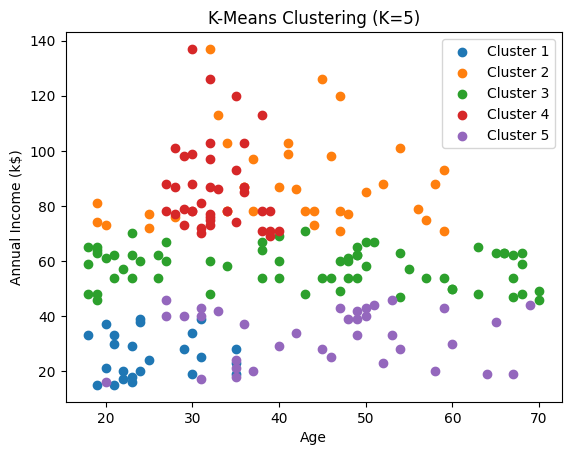

In [26]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Age'], cluster_df['Annual Income (k$)'], label=f'Cluster {i + 1}')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-Means Clustering (K=5)')
plt.legend()
plt.show()

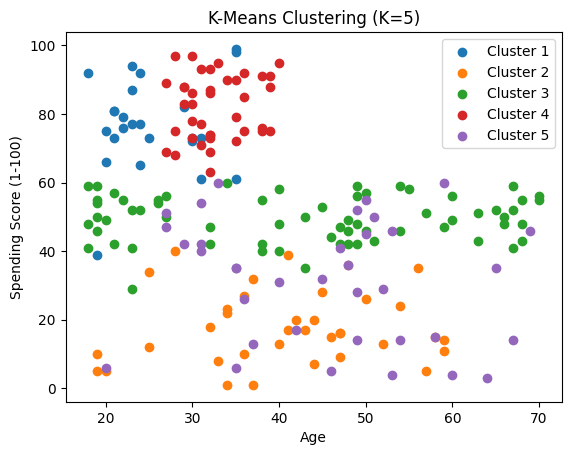

In [ ]:
# Visualize the clusters
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Age'], cluster_df['Spending Score (1-100)'], label=f'Cluster {i + 1}')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (K=5)')
plt.legend()
plt.show()
